In [19]:
# Dependencies
import tensorflow

import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [20]:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [21]:
# pandas, pandas_datareader, numpy and matplotlib
import numpy as np
import pandas as pd
#import pandas_datareader.data as web 
from matplotlib import pyplot

In [22]:
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [71]:
# stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_tickers = ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']

In [47]:
!pip install pandas-datareader

In [48]:
import pandas_datareader.data as web

In [49]:
stk_data = web.DataReader(stk_tickers, 'yahoo')

In [50]:
return_period = 5 #Rendimiento Semanal

In [51]:
stk_data

Attributes   Adj Close                                                      \
Symbols           ABBV        AMGN        AZN        BIIB        BMY  CRXT   
Date                                                                         
2016-11-15   49.962433  128.372803  23.180246  322.579987  48.855831   NaN   
2016-11-16   48.905495  128.521210  22.987289  317.649994  48.433552   NaN   
2016-11-17   49.032642  128.634750  22.945337  319.299988  48.847221   NaN   
2016-11-18   48.094898  126.775398  22.752380  317.000000  48.916157   NaN   
2016-11-21   48.015430  127.054733  22.936951  318.320007  48.890301   NaN   
...                ...         ...        ...         ...        ...   ...   
2021-11-08  116.059998  211.369995  62.990002  272.700012  59.410000  5.25   
2021-11-09  115.610001  211.710007  62.700001  270.029999  59.459999  5.17   
2021-11-10  116.750000  213.210007  63.139999  266.929993  59.389999  4.98   
2021-11-11  116.629997  211.559998  62.919998  266.570007  59.189999  4.70   
2021-11-12  116.970001  211.389999  58.799999  270.429993  59.430000  4.67   

Attributes                                              ...     Volume  \
Symbols          GILD       GRFS        GSK        HCM  ...       HZNP   
Date                                                    ...              
2016-11-15  64.051781  14.068149  30.329741  11.800000  ...  2747700.0   
2016-11-16  63.758167  13.835173  29.745426  11.960000  ...  4375400.0   
2016-11-17  63.405815  13.897896  29.955770  12.010000  ...  3274400.0   
2016-11-18  62.600456  13.763487  29.690889  12.310000  ...  2996700.0   
2016-11-21  62.902466  13.808291  29.940201  12.490000  ...  1688900.0   
...               ...        ...        ...        ...  ...        ...   
2021-11-08  65.970001  12.500000  42.770000  30.030001  ...  2836500.0   
2021-11-09  66.150002  12.300000  42.730000  30.290001  ...  1514300.0   
2021-11-10  67.320000  12.300000  43.180000  30.020000  ...  1737000.0   
2021-11-11  67.430000  12.050000  43.230000  30.540001  ...  1000800.0   
2021-11-12  67.480003  11.980000  43.360001  31.049999  ...  1570900.0   

Attributes                                                           \
Symbols            JNJ        LLY         MRK        NVO        NVS   
Date                                                                  
2016-11-15   7446700.0  3097600.0   7640339.0  3836700.0  3210732.0   
2016-11-16   6594800.0  1922300.0  11297650.0  3179200.0  8151376.0   
2016-11-17   5730300.0  4519200.0   8762642.0  2400500.0  3512387.0   
2016-11-18   7717800.0  4571600.0   8066351.0  3781200.0  3198233.0   
2016-11-21   5843300.0  4060300.0   7164862.0  3988600.0  3130938.0   
...                ...        ...         ...        ...        ...   
2021-11-08   5578800.0  2386100.0  18655700.0   952400.0  2232200.0   
2021-11-09   6112800.0  1963800.0  10512000.0   690900.0  2026700.0   
2021-11-10   6225100.0  2215100.0   9855900.0   967200.0  2509000.0   
2021-11-11   4118800.0  1739400.0   5761500.0  1035700.0  3162100.0   
2021-11-12  18982100.0  1964000.0   8203900.0   550000.0  1754800.0   

Attributes                                              
Symbols           OGN         PFE        SNY      TSVT  
Date                                                    
2016-11-15        NaN  31213472.0  1731700.0       NaN  
2016-11-16        NaN  23864246.0  1532700.0       NaN  
2016-11-17        NaN  27502549.0  1878700.0       NaN  
2016-11-18        NaN  25460846.0  2216900.0       NaN  
2016-11-21        NaN  23053931.0  1171500.0       NaN  
...               ...         ...        ...       ...  
2021-11-08  3474500.0  57423300.0   865600.0  547300.0  
2021-11-09  2567400.0  29920400.0  1291500.0  404200.0  
2021-11-10  4025500.0  42696200.0  1134200.0  815000.0  
2021-11-11  5810200.0  42370400.0   606300.0  344100.0  
2021-11-12  2531100.0  27766700.0  1064200.0  511100.0  

[1258 rows x 120 columns]

<AxesSubplot:xlabel='Date'>

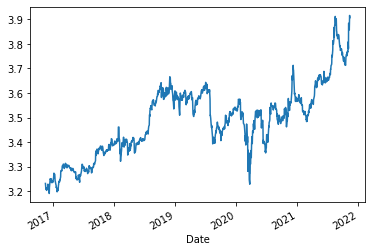

In [52]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).plot()

<AxesSubplot:xlabel='Date'>

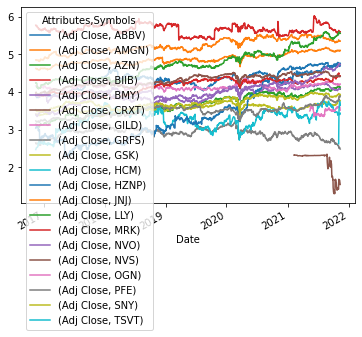

In [53]:
np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).plot()

In [54]:
#%matplotlib 

<ipython-input-55-415a31f2efe4>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=5)


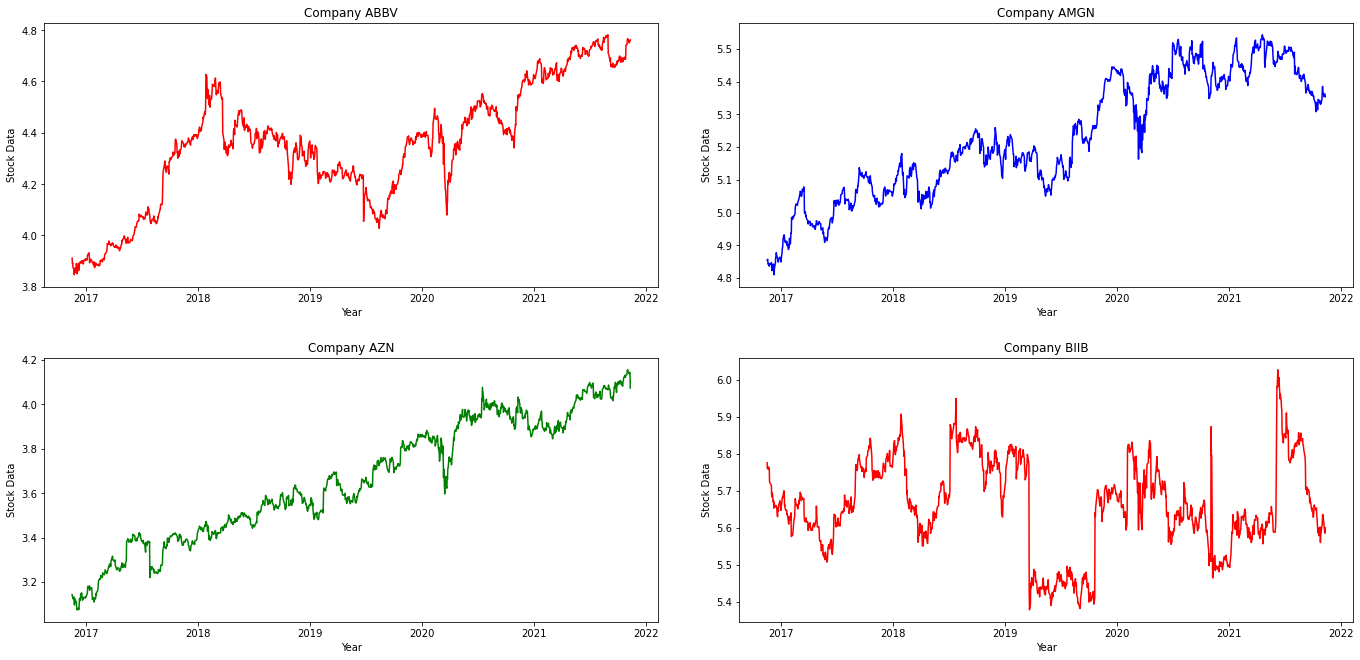

In [55]:
import matplotlib.pyplot as plt
# Tickers change
def test(to_plot,ax, r_count, c_count, c,s):
    #fig,ax = plt.subplots(1,2)
    #plt.subplot(1,2,2)
    #plt.plot(month, customer1, color="red", label="Customer 1", marker="o")
    ax[r_count,c_count].plot(p.index, p.values, color=c)
    ax[r_count,c_count].set_xlabel("Year")
    # ax[r_count,c_count].xticks(rotation=90)
    ax[r_count,c_count].set_ylabel("Stock Data")
    ax[r_count,c_count].set_title(f"Company {s}")
    #plt.show()

rows= 2
cols= 2    
fig,ax = plt.subplots(rows,cols, constrained_layout=True, figsize=(20,10))
fig.tight_layout(pad=5)
#fig.autofmt_xdate(rotation=90)
colors= ["red", "blue", "green"]
r_count=0
c_count=0

for i, s in enumerate(stk_tickers[:4]):
    p= np.log(stk_data.loc[:, ('Adj Close', s)])
    test(p, ax, r_count, c_count, colors[i%len(colors)], s)
    if c_count >= cols-1:
        c_count=0
        r_count+=1
    else:
        c_count+=1
#     print(i,s,p)
#     print(p.values)

#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

<ipython-input-56-2c9713371a8b>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=5)


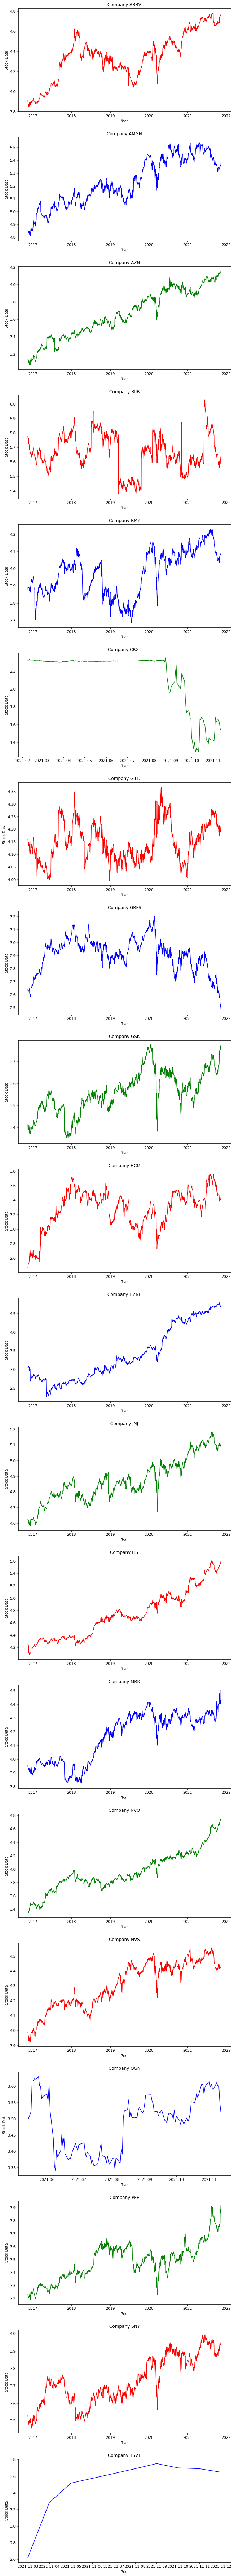

In [56]:
import matplotlib.pyplot as plt
# Tickers change
def test(to_plot,ax, i, c,s):
    #fig,ax = plt.subplots(1,2)
    #plt.subplot(1,2,2)
    #plt.plot(month, customer1, color="red", label="Customer 1", marker="o")
    ax[i].plot(p.index, p.values, color=c)
    ax[i].set_xlabel("Year")
    # ax[r_count,c_count].xticks(rotation=90)
    ax[i].set_ylabel("Stock Data")
    ax[i].set_title(f"Company {s}")
    #plt.show()

# rows= 2
# cols= 2    
fig,ax = plt.subplots(len(stk_tickers), 1, constrained_layout=True, figsize=(10,100))
fig.tight_layout(pad=5)
#fig.autofmt_xdate(rotation=90)
colors= ["red", "blue", "green"]
# r_count=0
# c_count=0

for i, s in enumerate(stk_tickers):
    p= np.log(stk_data.loc[:, ('Adj Close', s)])
    test(p, ax, i, colors[i%len(colors)], s)
#     if c_count >= cols-1:
#         c_count=0
#         r_count+=1
#     else:
#         c_count+=1
#     print(i,s,p)
#     print(p.values)

#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [57]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(5).shift(-5)
#Vamos a generar la variable Y: Es el rendimiento semanal de MSFT en t+1
#Shift -5 les sube el dato 5 peridos. Dado que la base de menor a mayor tiempoe
#El hacer shift -5, les pone el dato de t+5 en t. (Para hacerlo supervisado)

Date
2016-11-15   -0.028322
2016-11-16   -0.017040
2016-11-17   -0.001261
2016-11-18    0.001904
2016-11-21    0.011025
                ...   
2021-11-08         NaN
2021-11-09         NaN
2021-11-10         NaN
2021-11-11         NaN
2021-11-12         NaN
Name: (Adj Close, PFE), Length: 1258, dtype: float64

<AxesSubplot:xlabel='Date'>

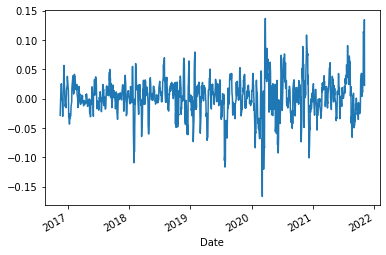

In [58]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(5).shift(-5).plot()

<ipython-input-59-abf24140dc9a>:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=5)


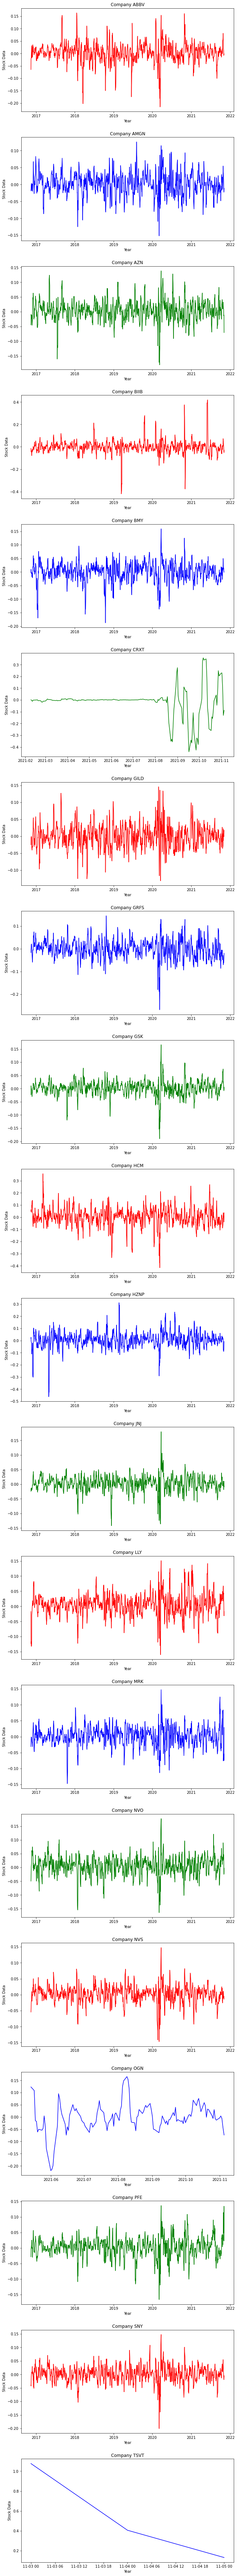

In [59]:
import matplotlib.pyplot as plt
# Tickers change
def test2(to_plot,ax, i, c,s):
    ax[i].plot(p.index, p.values, color=c)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Stock Data")
    ax[i].set_title(f"Company {s}")
    

fig,ax = plt.subplots(len(stk_tickers), 1, constrained_layout=True, figsize=(10,100))
fig.tight_layout(pad=5)
colors= ["red", "blue", "green"]

for i, s in enumerate(stk_tickers):
    p= np.log(stk_data.loc[:, ('Adj Close', s)]).diff(5).shift(-5)
    test2(p, ax, i, colors[i%len(colors)], s)
plt.show()

In [60]:
# Original
Y = np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(return_period).shift(-return_period)

In [61]:
# All stocks stk_tickers
Y = np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(return_period).shift(-return_period)

In [62]:
Y

Attributes Adj Close                                                         \
Symbols         ABBV      AMGN       AZN      BIIB       BMY CRXT      GILD   
Date                                                                          
2016-11-15 -0.064719 -0.018738 -0.044402 -0.013954 -0.002473  NaN -0.025066   
2016-11-16 -0.022347 -0.015055 -0.038316 -0.037594  0.009739  NaN -0.009253   
2016-11-17 -0.019475 -0.013184 -0.009183 -0.045164  0.005279  NaN -0.001854   
2016-11-18 -0.017670 -0.001102 -0.014485 -0.042598 -0.004414  NaN -0.001073   
2016-11-21  0.019179  0.003087 -0.023313 -0.050084 -0.006543  NaN -0.001468   
...              ...       ...       ...       ...       ...  ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN  NaN       NaN   

Attributes                                                              \
Symbols         GRFS       GSK       HCM      HZNP       JNJ       LLY   
Date                                                                     
2016-11-15 -0.016699 -0.023127  0.061621  0.016168 -0.024374 -0.017351   
2016-11-16  0.000000 -0.002098  0.049745  0.026619 -0.021795 -0.123518   
2016-11-17  0.000645  0.010607  0.045573 -0.005568 -0.014268 -0.117140   
2016-11-18  0.018065  0.004712  0.054537 -0.010801 -0.019520 -0.131837   
2016-11-21  0.021189 -0.004172  0.040021 -0.018824 -0.022157 -0.132190   
...              ...       ...       ...       ...       ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN       NaN   

Attributes                                                             
Symbols          MRK       NVO       NVS OGN       PFE       SNY TSVT  
Date                                                                   
2016-11-15 -0.031115 -0.049719 -0.054446 NaN -0.028322 -0.040079  NaN  
2016-11-16 -0.015933 -0.041266 -0.047952 NaN -0.017040 -0.042929  NaN  
2016-11-17 -0.007846 -0.023414 -0.041661 NaN -0.001261 -0.028457  NaN  
2016-11-18 -0.001132  0.003695 -0.022331 NaN  0.001904 -0.007523  NaN  
2016-11-21 -0.001767  0.014469 -0.016824 NaN  0.011025  0.006948  NaN  
...              ...       ...       ...  ..       ...       ...  ...  
2021-11-08       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-09       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-10       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-11       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-12       NaN       NaN       NaN NaN       NaN       NaN  NaN  

[1258 rows x 20 columns]

In [64]:
def get_df_name(Y):
    name =[x for x in globals() if globals()[x] is Y][0]
    return name

def plot_dist(Y,col):
    ax=sns.countplot(x=col,data=Y)
    ax.set_title(get_df_name(Y))
# Y.name = Y.name[i-1]+'_pred'

In [65]:
Y

Attributes Adj Close                                                         \
Symbols         ABBV      AMGN       AZN      BIIB       BMY CRXT      GILD   
Date                                                                          
2016-11-15 -0.064719 -0.018738 -0.044402 -0.013954 -0.002473  NaN -0.025066   
2016-11-16 -0.022347 -0.015055 -0.038316 -0.037594  0.009739  NaN -0.009253   
2016-11-17 -0.019475 -0.013184 -0.009183 -0.045164  0.005279  NaN -0.001854   
2016-11-18 -0.017670 -0.001102 -0.014485 -0.042598 -0.004414  NaN -0.001073   
2016-11-21  0.019179  0.003087 -0.023313 -0.050084 -0.006543  NaN -0.001468   
...              ...       ...       ...       ...       ...  ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN  NaN       NaN   

Attributes                                                              \
Symbols         GRFS       GSK       HCM      HZNP       JNJ       LLY   
Date                                                                     
2016-11-15 -0.016699 -0.023127  0.061621  0.016168 -0.024374 -0.017351   
2016-11-16  0.000000 -0.002098  0.049745  0.026619 -0.021795 -0.123518   
2016-11-17  0.000645  0.010607  0.045573 -0.005568 -0.014268 -0.117140   
2016-11-18  0.018065  0.004712  0.054537 -0.010801 -0.019520 -0.131837   
2016-11-21  0.021189 -0.004172  0.040021 -0.018824 -0.022157 -0.132190   
...              ...       ...       ...       ...       ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN       NaN   

Attributes                                                             
Symbols          MRK       NVO       NVS OGN       PFE       SNY TSVT  
Date                                                                   
2016-11-15 -0.031115 -0.049719 -0.054446 NaN -0.028322 -0.040079  NaN  
2016-11-16 -0.015933 -0.041266 -0.047952 NaN -0.017040 -0.042929  NaN  
2016-11-17 -0.007846 -0.023414 -0.041661 NaN -0.001261 -0.028457  NaN  
2016-11-18 -0.001132  0.003695 -0.022331 NaN  0.001904 -0.007523  NaN  
2016-11-21 -0.001767  0.014469 -0.016824 NaN  0.011025  0.006948  NaN  
...              ...       ...       ...  ..       ...       ...  ...  
2021-11-08       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-09       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-10       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-11       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-12       NaN       NaN       NaN NaN       NaN       NaN  NaN  

[1258 rows x 20 columns]

In [66]:
X1 = np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(return_period)
X1.columns = X1.columns.droplevel()

In [91]:
#Nos generfa rezagos de una semana, tres semanas , 6 semanas y 12 semanas. 

#for i, s in enumerate(stk_tickers):
#    p= np.log(stk_data.loc[:, ('Adj Close', s)])
#    test(p, ax, i, colors[i%len(colors)], s)

X4= pd.concat([np.log(stk_data.loc[:, ('Adj Close','MSFT')]).diff(i) 
               for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()

##X4 = pd.concat(
##    [np.log(stk_data.loc[:, ('Adj Close', stk_tickers)]).diff(i)
##        for i in [return_period, return_period*3,return_period*6, return_period*12]], axis=1).dropna()

SyntaxError: invalid syntax (<ipython-input-91-8f6b0a0ec97e>, line 7)

In [70]:
X4

Empty DataFrame
Columns: [(Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT)]
Index: []

[0 rows x 80 columns]

In [99]:
Y

Attributes Adj Close                                                         \
Symbols         ABBV      AMGN       AZN      BIIB       BMY CRXT      GILD   
Date                                                                          
2016-11-15 -0.064719 -0.018738 -0.044402 -0.013954 -0.002473  NaN -0.025066   
2016-11-16 -0.022347 -0.015055 -0.038316 -0.037594  0.009739  NaN -0.009253   
2016-11-17 -0.019475 -0.013184 -0.009183 -0.045164  0.005279  NaN -0.001854   
2016-11-18 -0.017670 -0.001102 -0.014485 -0.042598 -0.004414  NaN -0.001073   
2016-11-21  0.019179  0.003087 -0.023313 -0.050084 -0.006543  NaN -0.001468   
...              ...       ...       ...       ...       ...  ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN  NaN       NaN   

Attributes                                                              \
Symbols         GRFS       GSK       HCM      HZNP       JNJ       LLY   
Date                                                                     
2016-11-15 -0.016699 -0.023127  0.061621  0.016168 -0.024374 -0.017351   
2016-11-16  0.000000 -0.002098  0.049745  0.026619 -0.021795 -0.123518   
2016-11-17  0.000645  0.010607  0.045573 -0.005568 -0.014268 -0.117140   
2016-11-18  0.018065  0.004712  0.054537 -0.010801 -0.019520 -0.131837   
2016-11-21  0.021189 -0.004172  0.040021 -0.018824 -0.022157 -0.132190   
...              ...       ...       ...       ...       ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN       NaN   

Attributes                                                             
Symbols          MRK       NVO       NVS OGN       PFE       SNY TSVT  
Date                                                                   
2016-11-15 -0.031115 -0.049719 -0.054446 NaN -0.028322 -0.040079  NaN  
2016-11-16 -0.015933 -0.041266 -0.047952 NaN -0.017040 -0.042929  NaN  
2016-11-17 -0.007846 -0.023414 -0.041661 NaN -0.001261 -0.028457  NaN  
2016-11-18 -0.001132  0.003695 -0.022331 NaN  0.001904 -0.007523  NaN  
2016-11-21 -0.001767  0.014469 -0.016824 NaN  0.011025  0.006948  NaN  
...              ...       ...       ...  ..       ...       ...  ...  
2021-11-08       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-09       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-10       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-11       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-12       NaN       NaN       NaN NaN       NaN       NaN  NaN  

[1258 rows x 20 columns]

In [104]:
Y_copy = Y.copy()

In [110]:
Y_copy.set_index("Adj Close")

ValueError: Index data must be 1-dimensional

In [52]:
X4.columns = [f'{stk_tickers}_DT', f'{stk_tickers}_3DT', f'{stk_tickers}_6DT', f'{stk_tickers}_12DT']

ValueError: Length mismatch: Expected axis has 80 elements, new values have 4 elements

In [53]:
X4

Empty DataFrame
Columns: [(Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT), (Adj Close, ABBV), (Adj Close, AMGN), (Adj Close, AZN), (Adj Close, BIIB), (Adj Close, BMY), (Adj Close, CRXT), (Adj Close, GILD), (Adj Close, GRFS), (Adj Close, GSK), (Adj Close, HCM), (Adj Close, HZNP), (Adj Close, JNJ), (Adj Close, LLY), (Adj Close, MRK), (Adj Close, NVO), (Adj Close, NVS), (Adj Close, OGN), (Adj Close, PFE), (Adj Close, SNY), (Adj Close, TSVT)]
Index: []

[0 rows x 80 columns]

In [80]:
X = pd.concat([X1, X2, X3, X4], axis=1)

NameError: name 'X2' is not defined

In [81]:
len(X)

NameError: name 'X' is not defined

In [82]:
#"inicia:termina:brincos " #Esto nos va a dejar con sólo semanas. 
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]

NameError: name 'X' is not defined

In [83]:
dataset
#Ahora sólo 225 observaciones (puras semanas)

NameError: name 'dataset' is not defined

In [84]:
Y = dataset.loc[:,Y.name]

NameError: name 'dataset' is not defined

In [85]:
X = dataset.loc[:, X.columns]

NameError: name 'dataset' is not defined

In [86]:
dataset.head()

NameError: name 'dataset' is not defined

In [87]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

NameError: name 'dataset' is not defined

In [88]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

NameError: name 'dataset' is not defined

<Figure size 1080x1080 with 0 Axes>

In [89]:

res = sm.tsa.seasonal_decompose(Y,period=52)

ValueError: This function does not handle missing values

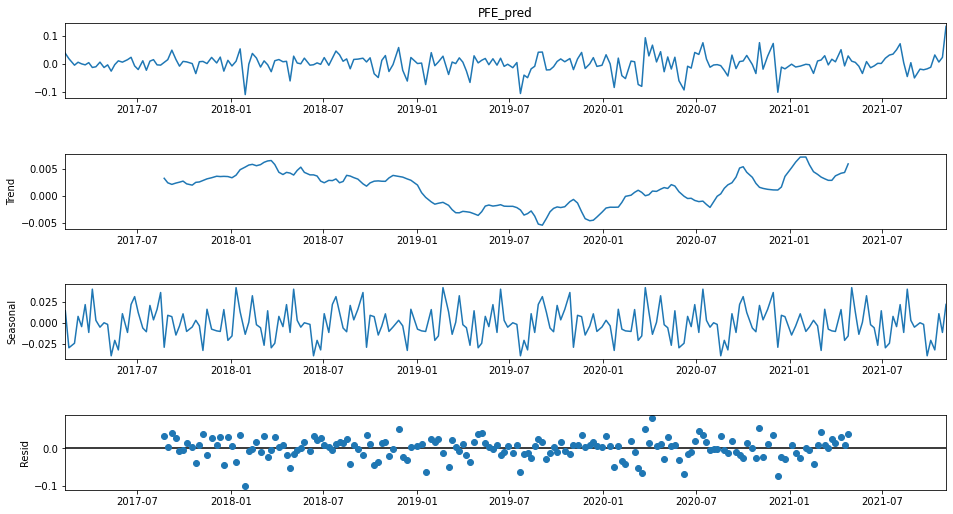

In [35]:
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [36]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [37]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [38]:

#Sin tuning de hiperparámetros
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [39]:
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor())) 
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [40]:
from random import seed

In [41]:
seed(1)

In [42]:
names = []
kfold_results = [] 
test_results = [] 
train_results = []
for name, model in models:
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train) 
    train_results.append(train_result)
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test) 
    test_results.append(test_result)

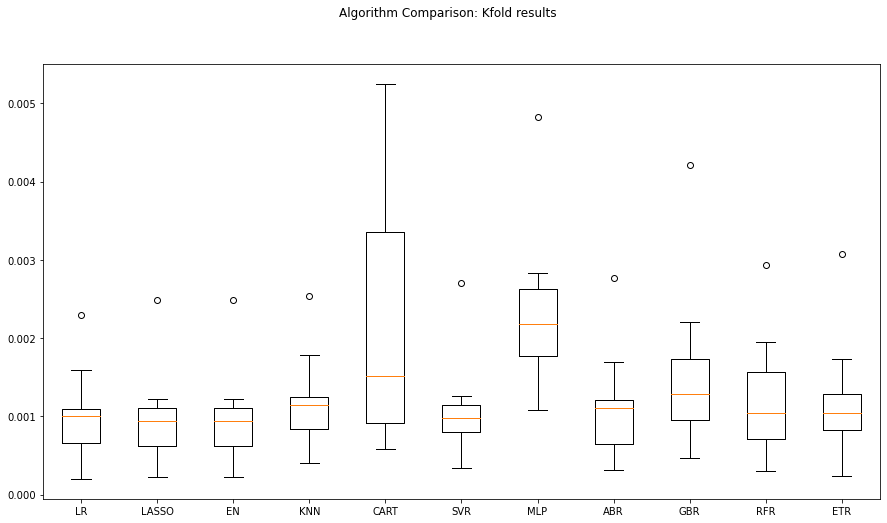

In [43]:

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

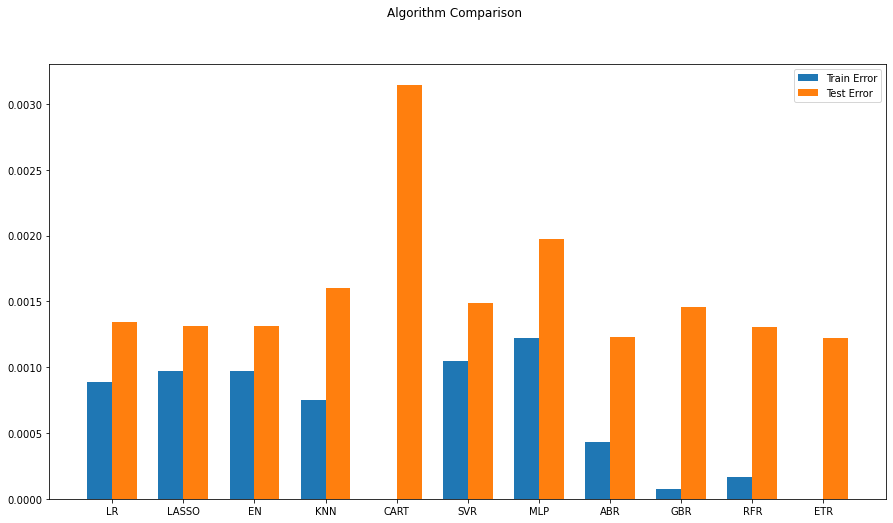

In [44]:
# Compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [79]:
#ahora vamos a hacer un ARIMA
#ya no es necesario meterle rezagos de MSFT
# X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
# X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]

X_train_ARIMA=X_train.loc[:, ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']]
X_test_ARIMA=X_test.loc[:, ['ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK', 'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT']]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

NameError: name 'X_train' is not defined

In [78]:
X_train_ARIMA

NameError: name 'X_train_ARIMA' is not defined

In [ ]:
X_train_ARIMA.index=pd.DatetimeIndex(X_train_ARIMA.index).to_period('W')

In [ ]:

Y_train.index=pd.DatetimeIndex(Y_train.index).to_period('W')

In [ ]:
#Cuando hay variables exógeneas se dice que es un ARIMAX
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

In [ ]:

predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

In [ ]:
#vamos a agregar una RNN LSTM
seq_len = 2 #Length of the seq for the LSTM
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))

In [ ]:
X_test_LSTM.shape

In [ ]:

X_test_LSTM

In [ ]:
for i in range(seq_len):
        X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
        X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [ ]:
X_test_LSTM.shape

In [ ]:

X_test_LSTM

In [ ]:

# LSTM Network
def create_LSTMmodel(learn_rate = 0.01, momentum=0): # create model
        model = Sequential()
        model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1],X_train_LSTM.shape[2])))
        model.add(Dense(1))

        #More cells can be added if needed model.add(Dense(1))
        optimizer = SGD(lr=learn_rate, momentum=momentum) 
        model.compile(loss='mse', optimizer='adam')
        return model
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

In [ ]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', )
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',)
pyplot.legend()
pyplot.show()

In [ ]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM,LSTMModel.predict(X_train_LSTM))

In [ ]:
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

In [ ]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)
train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)
names.append("ARIMA")
names.append("LSTM")

In [ ]:
# correr estos
#'ABBV', 'AMGN', 'AZN', 'BIIB', 'BMY', 'CRXT', 'GILD', 'GRFS','GSK',
#'HCM', 'HZNP', 'JNJ', 'LLY', 'MRK','NVO','NVS', 'OGN','PFE','SNY','TSVT'

In [ ]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [73]:
def evaluate_arima_model(arima_order):
#predicted = list() 
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order) 
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

In [74]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q) 
                try:
                    mse = evaluate_arima_model(order) 
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except: 
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

In [75]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [76]:
# ARIMA(2, 0, 1) MSE=0.0009632

In [77]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

NameError: name 'Y_train' is not defined

In [ ]:
# plotting the actual data versus predicted data
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
# plotting t, a separately
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

# Time series forecasting with ARIMA

In [72]:
Y

Attributes Adj Close                                                         \
Symbols         ABBV      AMGN       AZN      BIIB       BMY CRXT      GILD   
Date                                                                          
2016-11-15 -0.064719 -0.018738 -0.044402 -0.013954 -0.002473  NaN -0.025066   
2016-11-16 -0.022347 -0.015055 -0.038316 -0.037594  0.009739  NaN -0.009253   
2016-11-17 -0.019475 -0.013184 -0.009183 -0.045164  0.005279  NaN -0.001854   
2016-11-18 -0.017670 -0.001102 -0.014485 -0.042598 -0.004414  NaN -0.001073   
2016-11-21  0.019179  0.003087 -0.023313 -0.050084 -0.006543  NaN -0.001468   
...              ...       ...       ...       ...       ...  ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN  NaN       NaN   

Attributes                                                              \
Symbols         GRFS       GSK       HCM      HZNP       JNJ       LLY   
Date                                                                     
2016-11-15 -0.016699 -0.023127  0.061621  0.016168 -0.024374 -0.017351   
2016-11-16  0.000000 -0.002098  0.049745  0.026619 -0.021795 -0.123518   
2016-11-17  0.000645  0.010607  0.045573 -0.005568 -0.014268 -0.117140   
2016-11-18  0.018065  0.004712  0.054537 -0.010801 -0.019520 -0.131837   
2016-11-21  0.021189 -0.004172  0.040021 -0.018824 -0.022157 -0.132190   
...              ...       ...       ...       ...       ...       ...   
2021-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN       NaN       NaN       NaN       NaN   

Attributes                                                             
Symbols          MRK       NVO       NVS OGN       PFE       SNY TSVT  
Date                                                                   
2016-11-15 -0.031115 -0.049719 -0.054446 NaN -0.028322 -0.040079  NaN  
2016-11-16 -0.015933 -0.041266 -0.047952 NaN -0.017040 -0.042929  NaN  
2016-11-17 -0.007846 -0.023414 -0.041661 NaN -0.001261 -0.028457  NaN  
2016-11-18 -0.001132  0.003695 -0.022331 NaN  0.001904 -0.007523  NaN  
2016-11-21 -0.001767  0.014469 -0.016824 NaN  0.011025  0.006948  NaN  
...              ...       ...       ...  ..       ...       ...  ...  
2021-11-08       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-09       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-10       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-11       NaN       NaN       NaN NaN       NaN       NaN  NaN  
2021-11-12       NaN       NaN       NaN NaN       NaN       NaN  NaN  

[1258 rows x 20 columns]

In [15]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


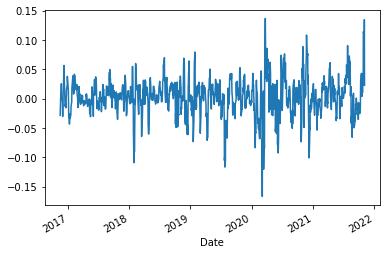

In [17]:
np.log(stk_data.loc[:, ('Adj Close', 'PFE')]).diff(5).shift(-5).plot()

l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue